Welcome to this notebook!

This notebook was created for the course 'DBM140 Embodying intelligent behavior in social context'

This notebook was created by Group 8 with the students:
- Gerben Koopmans
- Timo Maessen
- Joris Lodewijks
- Niels Winkelman

The main element of this notebook is the data exploration before the machine learning. The machine learning notebook is a seperate file. 
The event title processing has already happened here, and only some data cleaning is performed in this notebook.

Keep in mind that this code been written with the help of ChatGPT-4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load heart rate data and calendar data from their respective CSV files.
heart_rate_df = pd.read_csv('heartrate.csv')
calendar_df = pd.read_csv('calendar.csv')

In [3]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   TAG_LECTURE            895 non-null    bool 
 1   TAG_MEETING            895 non-null    bool 
 2   TAG_WORKOUT            895 non-null    bool 
 3   TAG_VOLLEYBAL          895 non-null    bool 
 4   TAG_PARTY              895 non-null    bool 
 5   TAG_TUTOR              895 non-null    bool 
 6   TAG_HAIRCUT            895 non-null    bool 
 7   TAG_SELFSTUDY          895 non-null    bool 
 8   TAG_PROMOCIE           895 non-null    bool 
 9   TAG_COOKING            895 non-null    bool 
 10  TAG_STEYL              895 non-null    bool 
 11  TAG_CALLING            895 non-null    bool 
 12  TAG_HIGHSCHOOLFRIENDS  895 non-null    bool 
 13  DURATION               895 non-null    int64
 14  DAY_OF_WEEK            895 non-null    int64
 15  HOUR_OF_DAY            895 non-null    i

In [4]:
# Filter calendar data to remove event shorter than 15 minutes. 
calendar_df = calendar_df[calendar_df['DURATION'] >= 15]

In [5]:

calendar_df['START_TIME'] = pd.to_datetime(calendar_df['START_TIME'] + 7200000, unit='ms', errors='coerce')
calendar_df['END_TIME'] = pd.to_datetime(calendar_df['END_TIME'] + 7200000, unit='ms', errors='coerce')
calendar_df.dropna(subset=['START_TIME', 'END_TIME'], inplace=True)

In [6]:
heart_rate_df['datetime'] = pd.to_datetime(heart_rate_df['date'] + ' ' + heart_rate_df['time'])

In [7]:
# Create empty lists to store computed heart rates
avg_heart_rates = []
median_heart_rates = []
tenth_percentile_rates = []
ninetieth_percentile_rates = []

# Iterate over each row in the calendar dataframe
for index, row in calendar_df.iterrows():
    start, end = row['START_TIME'], row['END_TIME']
    
    # Filter heart_rate_df for entries within the event's start and end time
    mask = (heart_rate_df['datetime'] >= start) & (heart_rate_df['datetime'] <= end)
    filtered_heart_rate = heart_rate_df[mask]
    
    # Calculate the average heart rate and append to list
    avg_heart_rate = filtered_heart_rate['heartRate'].mean()
    avg_heart_rates.append(avg_heart_rate)
    
    # Calculate the median heart rate and append to list
    median_rate = filtered_heart_rate['heartRate'].median()
    median_heart_rates.append(median_rate)
    
    # Calculate the 10th percentile heart rate and append to list
    tenth_percentile = filtered_heart_rate['heartRate'].quantile(0.10)
    tenth_percentile_rates.append(tenth_percentile)
    
    # Calculate the 90th percentile heart rate and append to list
    ninetieth_percentile = filtered_heart_rate['heartRate'].quantile(0.90)
    ninetieth_percentile_rates.append(ninetieth_percentile)

# Add the computed heart rate lists as new columns in calendar_df
calendar_df['avg_heart_rate'] = avg_heart_rates
calendar_df['median_heart_rate'] = median_heart_rates
calendar_df['10th_percentile_rate'] = tenth_percentile_rates
calendar_df['90th_percentile_rate'] = ninetieth_percentile_rates

In [8]:
# Some calendar events did not have a full heartrate reading and therefore become undefined. Delete this rows.
calendar_df.dropna(subset=['avg_heart_rate'], inplace=True)

In [9]:
# General outliers check
all_tags = [
    'TAG_WORKOUT', 'TAG_VOLLEYBAL', 'TAG_PARTY', 'TAG_LECTURE', 'TAG_MEETING', 'TAG_TUTOR', 'TAG_HAIRCUT', 
    'TAG_SELFSTUDY', 'TAG_PROMOCIE', 'TAG_COOKING', 'TAG_STEYL', 
    'TAG_CALLING', 'TAG_HIGHSCHOOLFRIENDS'
]

calendar_df.sort_values(by='avg_heart_rate', ascending=False).drop(columns=all_tags).tail()


,DURATION,DAY_OF_WEEK,HOUR_OF_DAY,START_TIME,END_TIME,EVENTS_PER_DAY,avg_heart_rate,median_heart_rate,10th_percentile_rate,90th_percentile_rate
612,90,2,8,2023-08-15 08:30:00,2023-08-15 10:00:00,2,53.835165,51.0,48.0,62.0
839,60,5,9,2022-08-26 09:00:00,2022-08-26 10:00:00,3,52.516667,51.5,47.9,60.1
589,90,2,8,2023-07-18 08:30:00,2023-07-18 10:00:00,2,51.613636,50.0,47.7,57.3
580,90,1,8,2023-07-10 08:30:00,2023-07-10 10:00:00,1,49.989011,48.0,46.0,58.0
598,90,5,8,2023-07-28 08:30:00,2023-07-28 10:00:00,2,48.315789,48.0,45.8,51.2


In [10]:
# Some of the previous values are too low
# Only keep events where the heartrate is over 60
calendar_df = calendar_df[calendar_df['avg_heart_rate'] >= 60]

In [11]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 0 to 892
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   TAG_LECTURE            730 non-null    bool          
 1   TAG_MEETING            730 non-null    bool          
 2   TAG_WORKOUT            730 non-null    bool          
 3   TAG_VOLLEYBAL          730 non-null    bool          
 4   TAG_PARTY              730 non-null    bool          
 5   TAG_TUTOR              730 non-null    bool          
 6   TAG_HAIRCUT            730 non-null    bool          
 7   TAG_SELFSTUDY          730 non-null    bool          
 8   TAG_PROMOCIE           730 non-null    bool          
 9   TAG_COOKING            730 non-null    bool          
 10  TAG_STEYL              730 non-null    bool          
 11  TAG_CALLING            730 non-null    bool          
 12  TAG_HIGHSCHOOLFRIENDS  730 non-null    bool          
 13  DURATION  

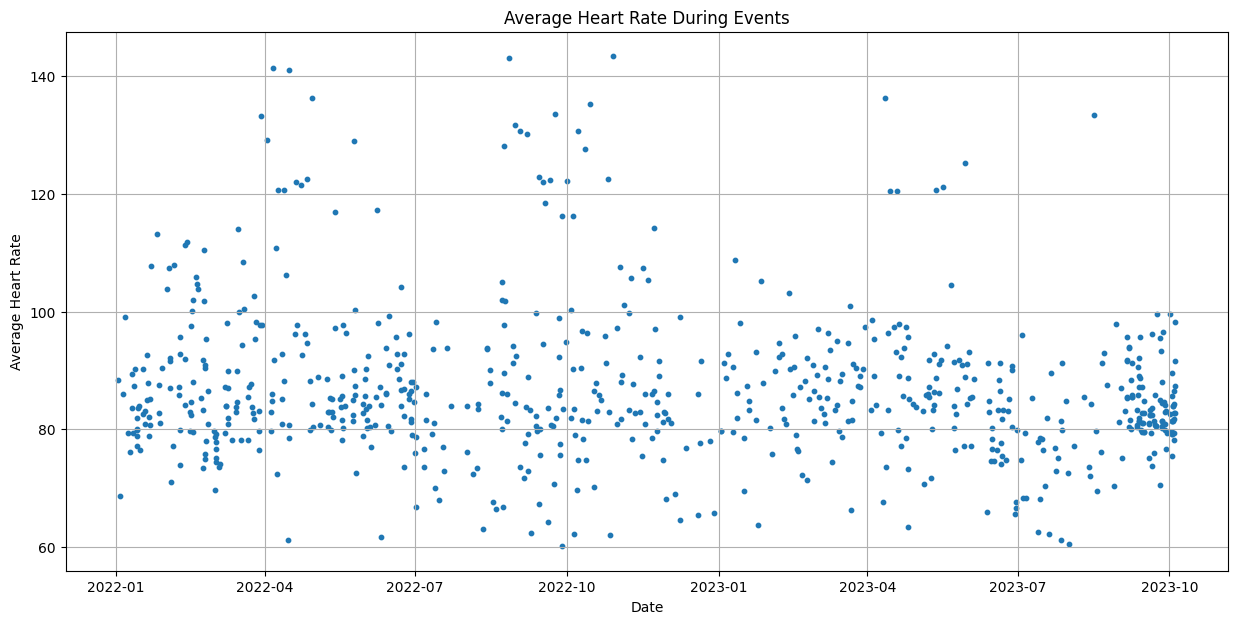

In [12]:
# Time to see how complete our dataset is.
# Scatter plot of average heart rates over time (events) for visualization.
# Scatter plot of average heart rates over time (events) with smaller dots for better visualization.
plt.figure(figsize=(15,7))
plt.scatter(calendar_df['START_TIME'], calendar_df['avg_heart_rate'], s=10)  # s=10 makes the dots smaller
plt.title('Average Heart Rate During Events')
plt.xlabel('Date')
plt.ylabel('Average Heart Rate')
plt.grid(True)
plt.show()

We have 730 entries (events) where there is a good heartrate reading for the event. These event range from 2022-01 to 2023-10.

C:\Users\Niels\AppData\Local\Temp\ipykernel_12700\1223333296.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calendar_df['avg_heart_rate'], kde=True, bins=30)


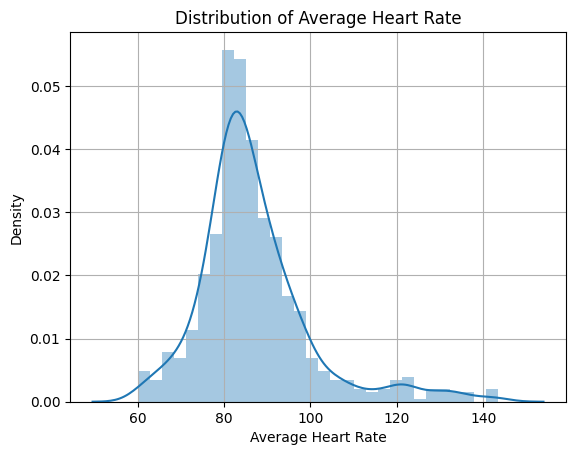

In [13]:
# Plotting the distribution of the average heart rate
sns.distplot(calendar_df['avg_heart_rate'], kde=True, bins=30)
plt.title('Distribution of Average Heart Rate')
plt.xlabel('Average Heart Rate')
plt.ylabel('Density')
plt.grid(True)
plt.show()

C:\Users\Niels\AppData\Local\Temp\ipykernel_12700\305624338.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calendar_df['avg_heart_rate'], kde=True, bins=30)


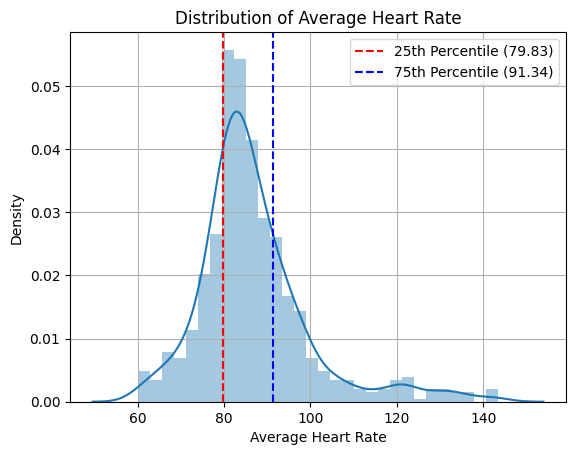

In [14]:
# Plotting the distribution of the average heartrate with vertical lines for 25th and 75th quantile. 

# Calculate the 25th and 75th percentiles
q1 = calendar_df['avg_heart_rate'].quantile(0.25)
q3 = calendar_df['avg_heart_rate'].quantile(0.75)

# Plotting the distribution of the heart rate
sns.distplot(calendar_df['avg_heart_rate'], kde=True, bins=30)
plt.title('Distribution of Average Heart Rate')
plt.xlabel('Average Heart Rate')
plt.ylabel('Density')
plt.grid(True)

# Add vertical lines for the 25th and 75th percentiles
plt.axvline(q1, color='red', linestyle='--', label=f'25th Percentile ({q1:.2f})')
plt.axvline(q3, color='blue', linestyle='--', label=f'75th Percentile ({q3:.2f})')
plt.legend()

plt.show()


In [15]:
# Filter the data to get only the rows between Q1 and Q3
filtered_data = calendar_df[(calendar_df['avg_heart_rate'] >= q1) & (calendar_df['avg_heart_rate'] <= q3)]

# Calculate the percentage of entries between the above red and blue line (25th and 75th percentile of avg heartrate) 
percentage = len(filtered_data) / len(calendar_df) * 100

q1

79.83467741935483

C:\Users\Niels\AppData\Local\Temp\ipykernel_12700\1850483910.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calendar_df['avg_heart_rate'], kde=True, bins=30, label="Average Heart Rate")
C:\Users\Niels\AppData\Local\Temp\ipykernel_12700\1850483910.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(calendar_df['median_heart_rate'], label="Median Heart Rate", shade=False)
C:\Users\Niels\AppData\Local\Temp\ipykernel_12700\1850483910.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill

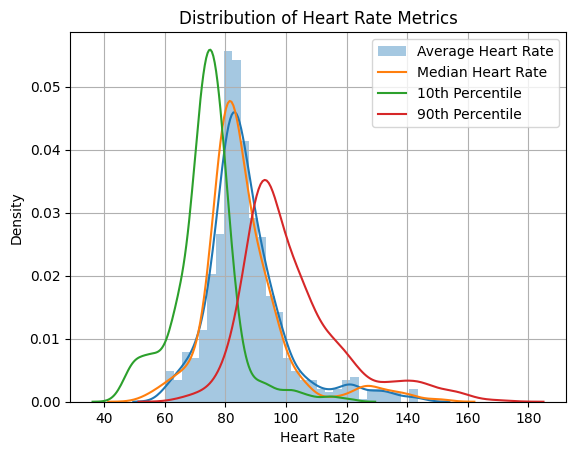

In [16]:
# Plotting the distribution of the average, median, and 10th and 90th quantile heartrate. 

# Calculate the 25th and 75th percentiles
q1 = calendar_df['avg_heart_rate'].quantile(0.25)
q3 = calendar_df['avg_heart_rate'].quantile(0.75)

# Plotting the distribution of the heart rate
sns.distplot(calendar_df['avg_heart_rate'], kde=True, bins=30, label="Average Heart Rate")

# Plot KDEs without histograms for median, 10th percentile, and 90th percentile
sns.kdeplot(calendar_df['median_heart_rate'], label="Median Heart Rate", shade=False)
sns.kdeplot(calendar_df['10th_percentile_rate'], label="10th Percentile", shade=False)
sns.kdeplot(calendar_df['90th_percentile_rate'], label="90th Percentile", shade=False)

plt.title('Distribution of Heart Rate Metrics')
plt.xlabel('Heart Rate')
plt.ylabel('Density')
plt.grid(True)


plt.legend()
plt.show()


In [17]:
# avg heartrate for sports and party tags
filter_sp = (calendar_df['TAG_PARTY'] == True) | (calendar_df['TAG_WORKOUT'] == True) | (calendar_df['TAG_VOLLEYBAL'] == True)
mean_heart_rate1 = calendar_df[filter_sp]['avg_heart_rate'].mean()
mean_heart_rate1

89.66501521029116

In [18]:
# avg heartrate for all other tags

temp_tags = [
    'TAG_LECTURE', 'TAG_MEETING', 'TAG_TUTOR', 'TAG_HAIRCUT', 
    'TAG_SELFSTUDY', 'TAG_PROMOCIE', 'TAG_COOKING', 'TAG_STEYL', 
    'TAG_CALLING', 'TAG_HIGHSCHOOLFRIENDS'
]
filter_other = calendar_df[temp_tags].any(axis=1)

final_filter = filter_other & ~filter_sp
mean_heart_rate2 = calendar_df[final_filter]['avg_heart_rate'].mean()
mean_heart_rate2

83.33404310820525

In [19]:
# Difference
mean_heart_rate1 - mean_heart_rate2

6.330972102085909

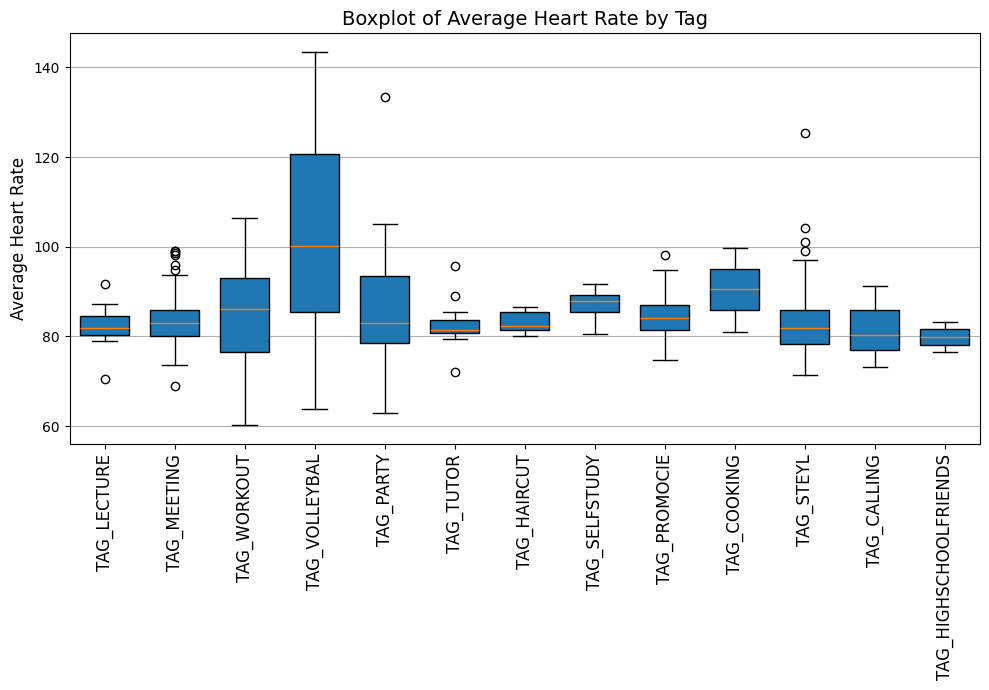

In [20]:
# Making a boxplot of average heartrate by tag

# Extracting tag columns (assuming they are of boolean type)
tag_columns = calendar_df.select_dtypes(include=bool).columns

data_to_plot = []

# Loop through the tag columns to create datasets for each tag
for tag in tag_columns:
    subset = calendar_df[calendar_df[tag] == True]
    data_to_plot.append(subset['avg_heart_rate'].values)

plt.figure(figsize=(10, 7))  # Set the size of the plot
box = plt.boxplot(data_to_plot, vert=True, patch_artist=True, widths=0.7)  # 'patch_artist' to set face colors and adjust widths

# Modify x-tick labels
plt.xticks(ticks=list(range(1, len(tag_columns) + 1)), labels=tag_columns, rotation=90, fontsize=12)
plt.ylabel('Average Heart Rate', fontsize=12)
plt.title('Boxplot of Average Heart Rate by Tag', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


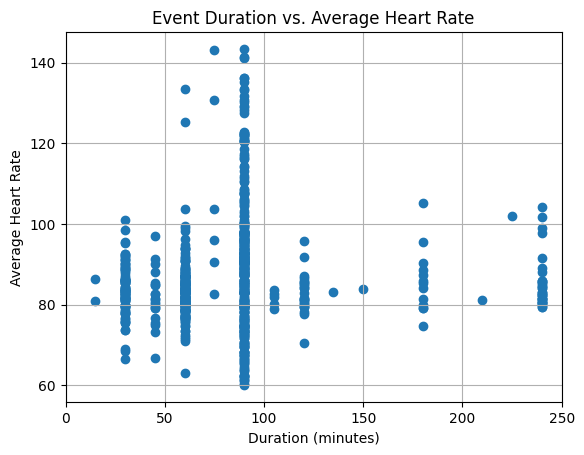

In [21]:
# Making a scatter plot of event duration against average heart rate

plt.scatter(calendar_df['DURATION'], calendar_df['avg_heart_rate'])
plt.title('Event Duration vs. Average Heart Rate')
plt.xlabel('Duration (minutes)')
plt.ylabel('Average Heart Rate')
plt.xlim(0, 250)  # Set the x-axis limits to be between 0 and 420 minutes
plt.grid(True)
plt.show()

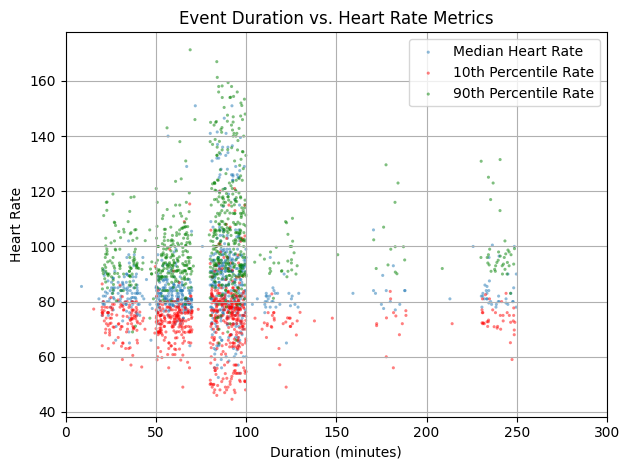

In [22]:
# Trying to make a plot to better understand the previous plot.
# Adding offset to understand the size and also plotting the percentiles to see if that yields some results.

# Generate random offsets for each data point. Adjust the magnitude of randomness as required.
offset_median = np.random.uniform(-10, 10, size=calendar_df.shape[0]) 
offset_10th = np.random.uniform(-10, 10, size=calendar_df.shape[0]) 
offset_90th = np.random.uniform(-10, 10, size=calendar_df.shape[0])

alpha_val = 0.5
size = 5

plt.scatter(calendar_df['DURATION'] + offset_median, calendar_df['median_heart_rate'], s=size, label='Median Heart Rate', alpha=alpha_val, edgecolors='none')
plt.scatter(calendar_df['DURATION'] + offset_10th, calendar_df['10th_percentile_rate'], color='red', s=size, label='10th Percentile Rate', alpha=alpha_val, edgecolors='none')
plt.scatter(calendar_df['DURATION'] + offset_90th, calendar_df['90th_percentile_rate'], color='green', s=size, label='90th Percentile Rate', alpha=alpha_val, edgecolors='none')

plt.title('Event Duration vs. Heart Rate Metrics')
plt.xlabel('Duration (minutes)')
plt.ylabel('Heart Rate')
plt.xlim(0, 300)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

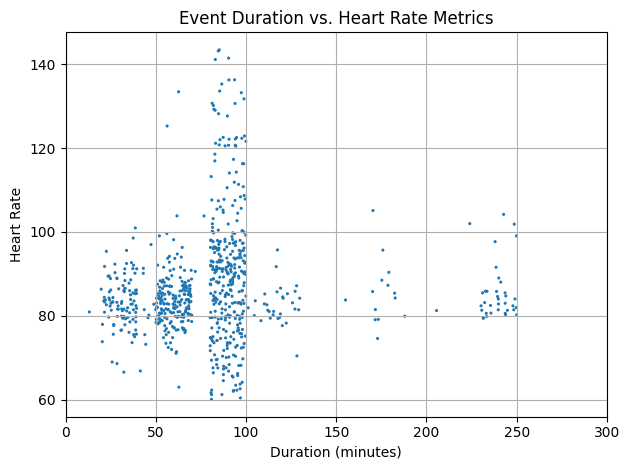

In [23]:
# Now try this with just the average heart rate.

# Generate random offsets for each data point. Adjust the magnitude of randomness as required.
offset = np.random.uniform(-10, 10, size=calendar_df.shape[0]) 

# Scatter plot for average heart rate with a bit larger marker size
plt.scatter(calendar_df['DURATION'] + offset, calendar_df['avg_heart_rate'], s=5, label='Average Heart Rate', edgecolors='none')

plt.title('Event Duration vs. Heart Rate Metrics')
plt.xlabel('Duration (minutes)')
plt.ylabel('Heart Rate')
plt.xlim(0, 300)
plt.grid(True)
plt.tight_layout()
plt.show()

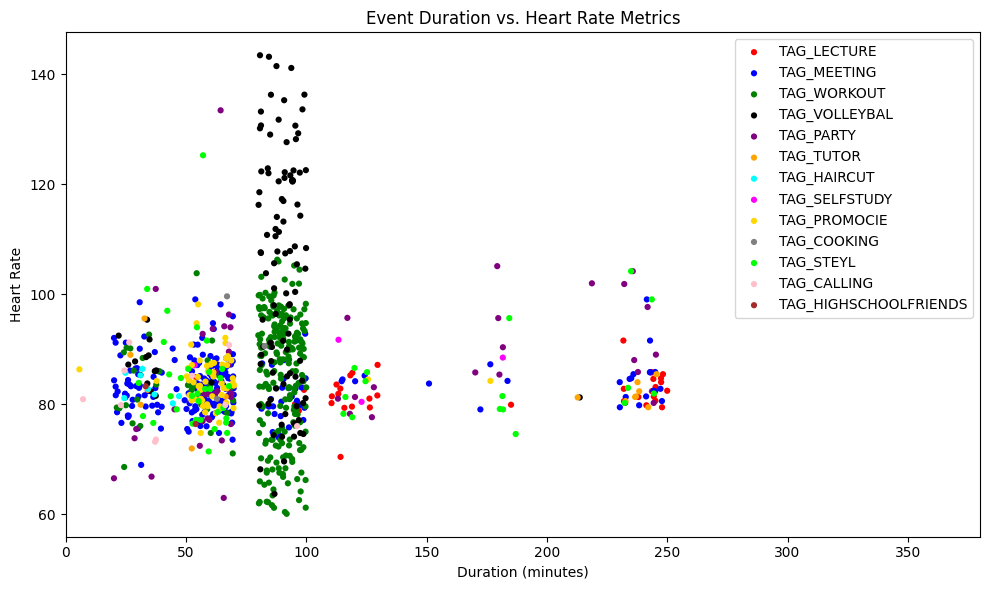

13

In [24]:
# Maybe seeing this in combination with the tags will give us some intereseting insights.

plt.figure(figsize=(10, 6))

# Extracting tag columns (assuming they are of boolean type)
tag_columns = calendar_df.select_dtypes(include=bool).columns
#colors = plt.cm.cividis(np.linspace(0, 1, len(tag_columns)))
colors = [
    'red', 'blue', 'green', 'black', 'purple', 
    'orange', 'cyan', 'magenta', 'gold', 'gray', 
    'lime', 'pink', 'brown'
]

# Loop through the tag columns to plot each subset of data with a unique color
for tag, color in zip(tag_columns, colors):
    subset = calendar_df[calendar_df[tag] == True]
    
    # Generate random offsets specifically for this subset
    offset_subset = np.random.uniform(-10, 10, size=subset.shape[0])
    
    plt.scatter(subset['DURATION'] + offset_subset, subset['avg_heart_rate'], s=20, label=tag, color=color, alpha=1, edgecolors="none")

plt.title('Event Duration vs. Heart Rate Metrics')
plt.xlabel('Duration (minutes)')
plt.ylabel('Heart Rate')
plt.xlim(0, 380)
plt.legend()
plt.tight_layout()
plt.show()

len(tag_columns)

We can clearly see that differently tagged events have different durations. For example, Volleybal and workout both almost exclusively take 90 minutes.

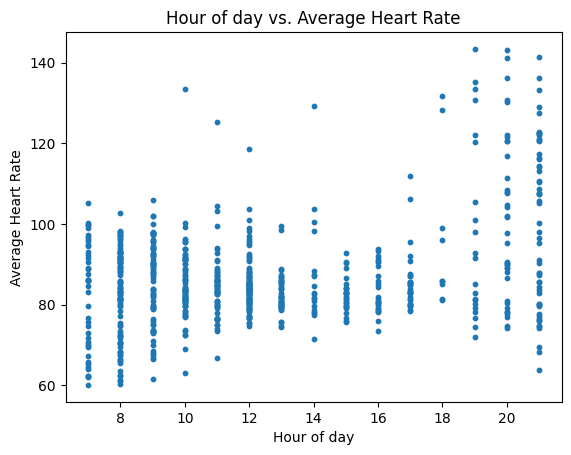

In [25]:
# Plot hour of day against average heart rate

plt.scatter(calendar_df['HOUR_OF_DAY'], calendar_df['avg_heart_rate'], s=10)

plt.title('Hour of day vs. Average Heart Rate')
plt.xlabel('Hour of day')
plt.ylabel('Average Heart Rate')
plt.show()

We can also see some results here, we keep exploring

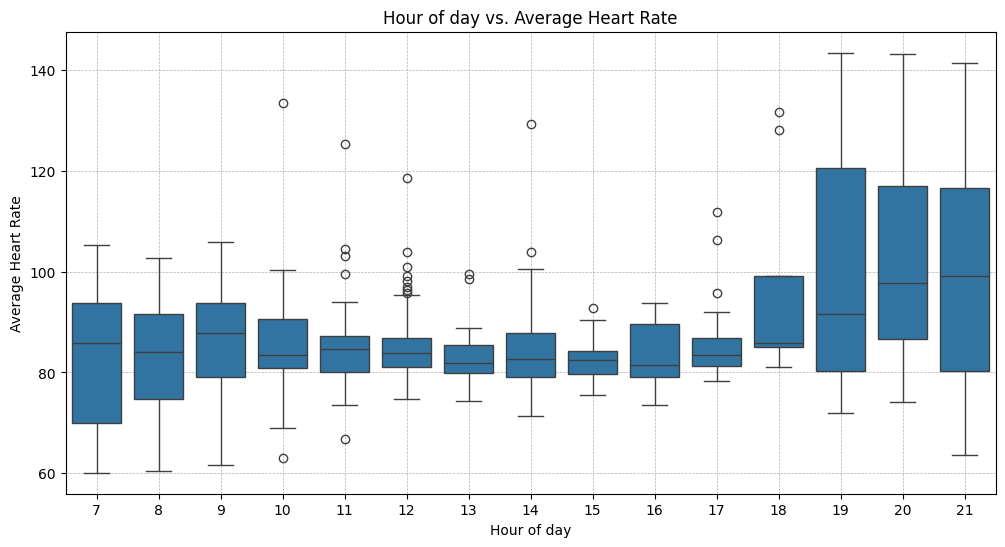

In [26]:
# Maybe a boxplot is more appropiate

plt.figure(figsize=(12, 6))  # Adjust the size as needed
sns.boxplot(x=calendar_df['HOUR_OF_DAY'], y=calendar_df['avg_heart_rate'])

plt.title('Hour of day vs. Average Heart Rate')
plt.xlabel('Hour of day')
plt.ylabel('Average Heart Rate')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

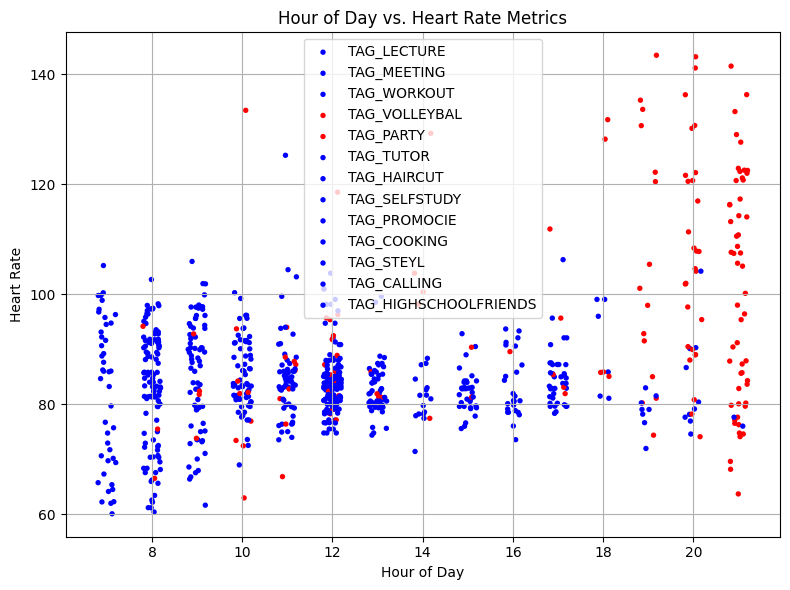

13

In [27]:
# We are now combining the two main correlations that we found by now, namely the tags and hour of day

tag_columns = calendar_df.select_dtypes(include=bool).columns

# Filtering sport and party to be red and the others blue
colors = [
    'blue', 'blue', 'blue', 'red', 'red', 
    'blue', 'blue', 'blue', 'blue', 'blue', 
    'blue', 'blue', 'blue'
]

plt.figure(figsize=(8,6))

for tag, color in zip(tag_columns, colors):
    subset = calendar_df[calendar_df[tag] == True]
    offset_subset = np.random.uniform(-0.2, 0.2, size=subset.shape[0])
    plt.scatter(subset['HOUR_OF_DAY'] + offset_subset, subset['avg_heart_rate'], s=15, label=tag, color=color, edgecolors='none')

plt.title('Hour of Day vs. Heart Rate Metrics')
plt.xlabel('Hour of Day')
plt.ylabel('Heart Rate')

plt.grid(True)
plt.legend()  # Show the legend to identify each tag by color
plt.tight_layout()
plt.show()

len(tag_columns)

This makes sense now, tags with sports and party are just during a later hour of day

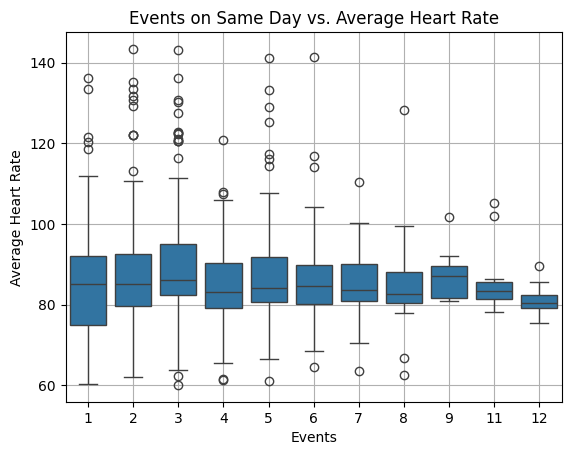

In [28]:
# Box plot for events_on_same_day vs avg_heart_rate

sns.boxplot(x=calendar_df['EVENTS_PER_DAY'], y=calendar_df['avg_heart_rate'])

plt.title('Events on Same Day vs. Average Heart Rate')
plt.xlabel('Events')
plt.ylabel('Average Heart Rate')
plt.grid(True)
plt.show()